# 1. Код на python

   0.155050833243877  0.974187332671136  0.0746745388023555  \
0           0.968379           0.716820            0.678846   
1           0.468263           0.405603            0.320325   
2           0.776820           0.103740            0.373748   
3           0.407886           0.415357            0.101543   
4           0.538797           0.088621            0.886119   

   0.442146032350138  0.369443477829918  0.468137626536191  0.578845957759768  \
0           0.510049           0.545299           0.573692           0.817491   
1           0.468084           0.100995           0.974407           0.300062   
2           0.797782           0.906810           0.599069           0.626680   
3           0.935160           0.444124           0.193607           0.656837   
4           0.781848           0.401623           0.207652           0.946310   

   0.42274355981499  0.931542937643826  0.474148423643783  15  
0          0.206636           0.880111           0.574187  17  
1     

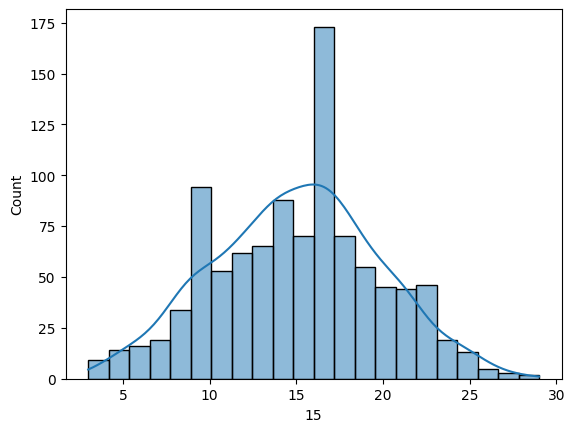

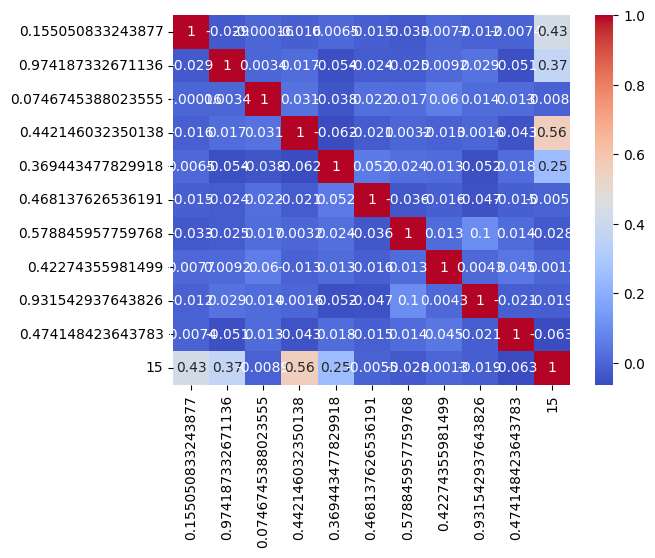

Mean squared error: 6.49
Coefficient of determination: 0.74
              Feature     F-Score       P-Value
3   0.442146032350138  453.708108  2.856423e-83
0   0.155050833243877  226.508372  2.781802e-46
1   0.974187332671136  158.816595  6.763935e-34
4   0.369443477829918   67.776082  5.697434e-16
9   0.474148423643783    3.946145  4.725231e-02
6   0.578845957759768    0.782964  3.764496e-01
8   0.931542937643826    0.354282  5.518340e-01
2  0.0746745388023555    0.078409  7.795230e-01
5   0.468137626536191    0.029864  8.628333e-01
7    0.42274355981499    0.001635  9.677572e-01


In [18]:
#импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Загрузка данных
df = pd.read_csv("preliminary_task.txt", delimiter="\t")


# Первичный анализ данных
print(df.head())
print(df.describe())

# Визуализация распределения выходной переменной
sns.histplot(data=df,x = y, kde=True)
plt.show()

# Визуализация корреляционной матрицы
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

# Выбор критерия для точности модели
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Определение важности каждой из 10 входных переменных
from sklearn.feature_selection import f_regression

f_scores, p_values = f_regression(X, y)
importance_df = pd.DataFrame({'Feature': list(X.columns),
                              'F-Score': f_scores,
                              'P-Value': p_values})
importance_df.sort_values(by='F-Score', ascending=False, inplace=True)
print(importance_df)



# 2. Краткое описание кода

1. Загрузка данных из файла preliminary_task.txt в объект DataFrame pandas.
2. Первичный анализ данных: вывод первых строк и основных статистик.
3. Визуализация распределения выходной переменной.
4. Визуализация корреляционной матрицы между переменными.
5. Выбор критерия для точности модели: разбиение данных на обучающую и тестовую выборки, обучение модели линейной регрессии, вычисление MSE и R2 на тестовой выборке.
6. Определение важности каждой из 10 входных переменных: вычисление F-статистики и соответствующих P-значений для каждой переменной, сортировка переменных по убыванию F-статистики.

# 3. Логика возможных доработок

1. Подбор оптимальных гиперпараметров модели. Каждый алгоритм машинного обучения имеет свои параметры, которые могут влиять на точность модели. Подбор оптимальных гиперпараметров может значительно улучшить качество
2. Преобразование данных. Например, можно применить стандартизацию, нормализацию, логарифмирование и др.
3. Добавление новых признаков. Можно рассмотреть возможность добавления новых признаков, которые могут улучшить точность модели. Например, можно добавить произведения или степени существующих признаков.
4. Использование ансамблей моделей. Ансамбли моделей, такие как случайный лес или градиентный бустинг, могут значительно улучшить качество модели за счет комбинирования нескольких моделей.
5. Проверка на переобучение. Важно проверить модель на переобучение, чтобы избежать недооценки ее качества на новых данных. Для этого можно использовать кросс-валидацию и анализировать метрики качества на тестовом наборе данных.
6. Проверка на выбросы и ошибки в данных. Необходимо проверить данные на наличие таких проблем и, если необходимо, провести их коррекцию.

# 4. Слайд презентации из Power Point

<img src="accenture.png">
